In [66]:
# Autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 2

# Manual reload
from importlib import reload

# Magic commands for inline plotting and high-res figures
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Standard library imports
import os
import sys
import pickle

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from tqdm import tqdm

# Add the parent directory to sys.path (if needed)
# from pathlib import Path
# sys.path.append(str(Path(os.getcwd()).parent))

# Pandas and plotting configurations
pd.set_option('display.max_rows', 1000)
idx = pd.IndexSlice

# Figure formatting
import rsmf
FIG_FORMATTER: rsmf.abstract_formatter.AbstractFormatter = rsmf.setup(
    r"\documentclass[a4paper,onecolumn,10pt,unpublished]{quantumarticle}"
)
COLORS = plt.get_cmap('tab10')
plt.rcParams.update({
    "axes.prop_cycle": plt.cycler("color", plt.cm.tab10.colors),
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "figure.constrained_layout.use": True,
    "figure.constrained_layout.h_pad": 0.02,
    "figure.constrained_layout.w_pad": 0.02,
    "figure.constrained_layout.hspace": 0.01,
    "figure.constrained_layout.wspace": 0.01,
    "legend.framealpha": 0.5,
})

# For in-line display of rsmf figures
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.use('module://matplotlib_inline.backend_inline')

# Utility functions
def write_pickle(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

from simulations.analysis.plotting_helpers import (
    error_band_plot, load_data
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## BB code

In [58]:
df_ps_dict = load_data("bb_sliding_window")

In [59]:
list(df_ps_dict.keys())

['mean_cluster_size_norm_frac_inf',
 'committed_cluster_size_norm_frac_inf',
 'committed_cluster_llr_norm_frac_2',
 'max_cluster_size_norm_frac_1',
 'mean_cluster_llr_norm_frac_1',
 'committed_cluster_llr_norm_frac_inf',
 'max_cluster_llr_norm_frac_2',
 'committed_cluster_size_norm_frac_2',
 'mean_cluster_size_norm_frac_1',
 'max_cluster_size_norm_frac_2',
 'mean_cluster_llr_norm_frac_2',
 'committed_cluster_llr_norm_frac_1',
 'mean_cluster_llr_norm_frac_inf',
 'max_cluster_llr_norm_frac_inf',
 'committed_cluster_size_norm_frac_1',
 'mean_cluster_size_norm_frac_2',
 'max_cluster_llr_norm_frac_1',
 'max_cluster_size_norm_frac_inf']

In [60]:
df_ps_dict["committed_cluster_llr_norm_frac_2"].head()

p_fail  delta_p_fail  \
n   T  p     W F committed_cluster_llr_norm_frac_2                           
144 12 0.005 3 1 0.0005                             0.062278      0.062278   
                 0.0006                             0.001303      0.001303   
                 0.0007                             0.000159      0.000159   
                 0.0008                             0.000061      0.000061   
                 0.0009                             0.000037      0.000037   

                                                     p_abort  delta_p_abort  \
n   T  p     W F committed_cluster_llr_norm_frac_2                            
144 12 0.005 3 1 0.0005                             0.999990       0.000003   
                 0.0006                             0.999509       0.000025   
                 0.0007                             0.995983       0.000072   
                 0.0008                             0.989556       0.000115   
                 0.0009                             0.982536       0.000148   

                                                    count  num_fails  \
n   T  p     W F committed_cluster_llr_norm_frac_2                     
144 12 0.005 3 1 0.0005                                27          0   
                 0.0006                              1470          0   
                 0.0007                             12049          0   
                 0.0008                             31331          0   
                 0.0009                             52389          0   

                                                    p_fail_conv  \
n   T  p     W F committed_cluster_llr_norm_frac_2                
144 12 0.005 3 1 0.0005                                     NaN   
                 0.0006                                     NaN   
                 0.0007                                     NaN   
                 0.0008                                     NaN   
                 0.0009                                     NaN   

                                                    delta_p_fail_conv  \
n   T  p     W F committed_cluster_llr_norm_frac_2                      
144 12 0.005 3 1 0.0005                                           NaN   
                 0.0006                                           NaN   
                 0.0007                                           NaN   
                 0.0008                                           NaN   
                 0.0009                                           NaN   

                                                    p_abort_conv  \
n   T  p     W F committed_cluster_llr_norm_frac_2                 
144 12 0.005 3 1 0.0005                                      NaN   
                 0.0006                                      NaN   
                 0.0007                                      NaN   
                 0.0008                                      NaN   
                 0.0009                                      NaN   

                                                    delta_p_abort_conv  \
n   T  p     W F committed_cluster_llr_norm_frac_2                       
144 12 0.005 3 1 0.0005                                            NaN   
                 0.0006                                            NaN   
                 0.0007                                            NaN   
                 0.0008                                            NaN   
                 0.0009                                            NaN   

                                                    count_conv  num_fails_conv  
n   T  p     W F committed_cluster_llr_norm_frac_2                              
144 12 0.005 3 1 0.0005                                    NaN             NaN  
                 0.0006                                    NaN             NaN  
                 0.0007                                    NaN             NaN  
                 0.0008                                    NaN   

In [52]:
df_ps_ordinary = load_data("bb_old")["cluster_llr_norm_2"]

df_ps_ordinary.head()

p_fail  delta_p_fail   p_abort  \
n  T p     cluster_llr_norm                                         
72 6 0.001 0.537231          2.930787e-08  2.930787e-08  0.934464   
           5.909539          1.560402e-08  1.560402e-08  0.876908   
           6.446770          1.205109e-08  1.205109e-08  0.840618   
           6.984000          9.663292e-09  9.663292e-09  0.801234   
           8.058462          7.295794e-09  7.295794e-09  0.736735   

                             delta_p_abort      count  num_fails  p_fail_conv  \
n  T p     cluster_llr_norm                                                     
72 6 0.001 0.537231               0.000015   65536304          0     0.000027   
           5.909539               0.000020  123091924          0     0.000027   
           6.446770               0.000023  159382267          0     0.000027   
           6.984000               0.000025  198765539          0     0.000027   
           8.058462               0.000027  263265302          0     0.000027   

                             delta_p_fail_conv  p_abort_conv  \
n  T p     cluster_llr_norm                                    
72 6 0.001 0.537231               3.499930e-07      0.158519   
           5.909539               3.499930e-07      0.158519   
           6.446770               3.499930e-07      0.158519   
           6.984000               3.499930e-07      0.158519   
           8.058462               3.499930e-07      0.158519   

                             delta_p_abort_conv   count_conv  num_fails_conv  
n  T p     cluster_llr_norm                                                   
72 6 0.001 0.537231                    0.000023  841481381.0         22579.0  
           5.909539                    0.000023  841481381.0         22579.0  
           6.446770                    0.000023  841481381.0         22579.0  
           6.984000                    0.000023  841481381.0         22579.0  
           8.058462                    0.000023  841481381.0         22579.0

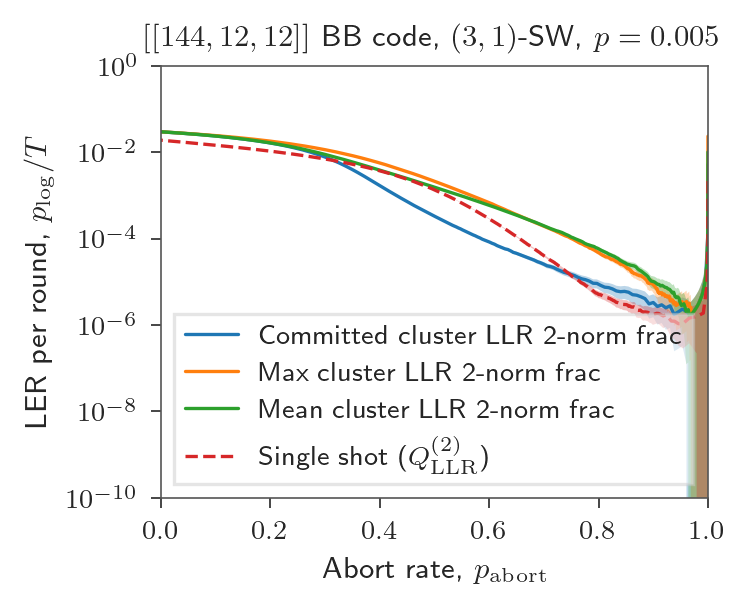

In [68]:
fig = FIG_FORMATTER.figure(aspect_ratio=0.8, width_ratio=0.5)
ax = fig.add_subplot()
n, T, p, W, F = prms = (144, 12, 5e-3, 3, 1)
labels = {
    "mean_cluster_llr_norm_frac_2": r"Mean cluster LLR 2-norm frac",
    "max_cluster_llr_norm_frac_2": r"Max cluster LLR 2-norm frac",
    "committed_cluster_llr_norm_frac_2": r"Committed cluster LLR 2-norm frac",
}
for by in df_ps_dict.keys():
    if by not in labels:
        continue
    df_ps = df_ps_dict[by].loc[prms]
    error_band_plot(
        df_ps["p_abort"],
        df_ps["p_fail"] / T,
        df_ps["delta_p_fail"] / T,
        ax=ax,
        label=labels[by],
    )

df_ps_ordinary_sng = df_ps_ordinary.loc[(n, T, p)]
error_band_plot(
    df_ps_ordinary_sng["p_abort"],
    df_ps_ordinary_sng["p_fail"] / T,
    df_ps_ordinary_sng["delta_p_fail"] / T,
    ax=ax,
    linestyle="--",
    label=r"Single shot ($Q_\mathrm{LLR}^{(2)}$)",
)

ax.set_yscale("log")
ax.set_xlim(0, 1)
ax.set_ylim(1e-10, 1)

ax.set_xlabel("Abort rate, $p_\mathrm{abort}$")
ax.set_ylabel("LER per round, $p_\mathrm{log}/T$")
ax.set_title(rf"$[[144, 12, 12]]$ BB code, $(3,1)$-SW, $p={p:.3f}$", fontsize=9)

ax.legend(fontsize=8)

fig.savefig("overleaf_figs/sliding_window_bb_code_ler_vs_abort_rate.pdf")